## Importing and Organizing Data in Python - World indices comparison, as of Dec 4th 2020

##### Start by importing the useful libraries

In [17]:
#Functions from pandas_datareader.data and pandas_datareader.wb extract data from various Internet sources into a pandas DataFrame.
from pandas_datareader import data as wb
from datetime import datetime
import pandas as pd 

import numpy as np 

#Using pyplot, we can get interactive plots and generate programmatic plots
import matplotlib.pyplot as plt 
%matplotlib inline 

#To visualize the results
import seaborn as sns
import yfinance as yf 
from scipy.stats import norm

##### Define the tickers you will need for the analysis, period, and interval

In [18]:
Tickers = ['^GSPC','^IXIC','^FCHI','^GDAXI','^HSI', '^N225','^KS11']

In [19]:
#Importing the data using panda's web reader
data = pd.DataFrame()
for t in Tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1', end='2020-12-04')['Adj Close']

#### Check the data type

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5266 entries, 2000-01-03 to 2020-12-04
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^GSPC   5266 non-null   float64
 1   ^IXIC   5266 non-null   float64
 2   ^FCHI   5208 non-null   float64
 3   ^GDAXI  5175 non-null   float64
 4   ^HSI    5023 non-null   float64
 5   ^N225   4954 non-null   float64
 6   ^KS11   4995 non-null   float64
dtypes: float64(7)
memory usage: 329.1 KB


##### Check Index level for top and bottom data set

In [21]:
#Checking top and bottom 5 data Index levels
data.head(5)

,^GSPC,^IXIC,^FCHI,^GDAXI,^HSI,^N225,^KS11
Date,,,,,,,
2000-01-03,1455.219971,4131.149902,5917.370117,6750.759766,17369.630859,NaN,NaN
2000-01-04,1399.420044,3901.689941,5672.020020,6586.950195,17072.820312,19002.859375,1059.040039
2000-01-05,1402.109985,3877.540039,5479.700195,6502.069824,15846.719727,18542.550781,986.309998
2000-01-06,1403.449951,3727.129883,5450.109863,6474.919922,15153.230469,18168.269531,960.789978
2000-01-07,1441.469971,3882.620117,5539.609863,6780.959961,15405.629883,18193.410156,948.650024


In [22]:
data.tail(5)

,^GSPC,^IXIC,^FCHI,^GDAXI,^HSI,^N225,^KS11
Date,,,,,,,
2020-11-30,3621.629883,12198.740234,5518.549805,13291.160156,26341.490234,26433.619141,2591.340088
2020-12-01,3662.449951,12355.110352,5581.640137,13382.299805,26567.679688,26787.539062,2634.250000
2020-12-02,3669.010010,12349.370117,5583.009766,13313.240234,26532.580078,26800.980469,2675.899902
2020-12-03,3666.719971,12377.179688,5574.359863,13252.860352,26728.500000,26809.369141,2696.219971
2020-12-04,3699.120117,12464.230469,5609.149902,13298.959961,26835.919922,26751.240234,2731.449951


##### Compute and print the Log returns for the data set

In [23]:
#pandas.Dataframe.shift(# lags)
#Using shift(1), we can get the row just above the present row. Here, # lags is 1.
#log() is a function given in numpy package in python. It calculates the natural log of the value given inside it.
#We will use a simple rate of return calculation instead of Log returns.
log_returns_data = (data / data.shift(1))-1

#Using name.head() instead or print() function to show the value inside it on the console.
log_returns_data.head(10)


,^GSPC,^IXIC,^FCHI,^GDAXI,^HSI,^N225,^KS11
Date,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.038345,-0.055544,-0.041463,-0.024265,-0.017088,NaN,NaN
2000-01-05,0.001922,-0.006190,-0.033907,-0.012886,-0.071816,-0.024223,-0.068675
2000-01-06,0.000956,-0.038790,-0.005400,-0.004176,-0.043762,-0.020185,-0.025874
2000-01-07,0.027090,0.041718,0.016422,0.047265,0.016656,0.001384,-0.012635
2000-01-10,0.011190,0.043025,0.019227,0.021319,0.028725,NaN,0.040679
2000-01-11,-0.013063,-0.031726,-0.005707,-0.004948,0.000880,NaN,-0.005986
2000-01-12,-0.004386,-0.018150,-0.005593,0.003129,-0.009324,-0.009204,-0.026821
2000-01-13,0.012170,0.027841,0.009089,0.006245,-0.005106,0.008345,-0.004147


In [24]:
#Cleaning and rearranging the data series with df['DataFrame Column'].replace(np.nan, 0) that replaces Non A Number (NaN) value to 0
log_returns_data = log_returns_data.replace(np.nan, 0)
log_returns_data

,^GSPC,^IXIC,^FCHI,^GDAXI,^HSI,^N225,^KS11
Date,,,,,,,
2000-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2000-01-04,-0.038345,-0.055544,-0.041463,-0.024265,-0.017088,0.000000,0.000000
2000-01-05,0.001922,-0.006190,-0.033907,-0.012886,-0.071816,-0.024223,-0.068675
2000-01-06,0.000956,-0.038790,-0.005400,-0.004176,-0.043762,-0.020185,-0.025874
2000-01-07,0.027090,0.041718,0.016422,0.047265,0.016656,0.001384,-0.012635
...,...,...,...,...,...,...,...
2020-11-30,-0.004596,-0.000582,-0.014224,-0.003338,-0.020569,-0.007922,-0.015990
2020-12-01,0.011271,0.012819,0.011432,0.006857,0.008587,0.013389,0.016559
2020-12-02,0.001791,-0.000465,0.000245,-0.005161,-0.001321,0.000502,0.015811


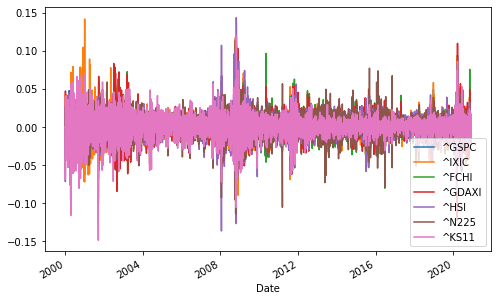

In [25]:
#Create a graph of the daily returns of each indices
log_returns_data.plot(figsize=(8,5))
plt.show()

##### Create a correlation matrix

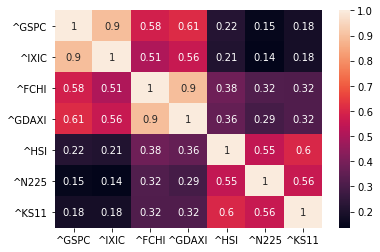

In [26]:
#Using pandas : df.corr() to plot a correlation matrix
matrix_correlation = log_returns_data.corr()

ax = plt.axes()
sns.heatmap(data= matrix_correlation,
            annot= True)

plt.show()

In [27]:
nb_weeks = len(data)

In [32]:
#Define the weights : equal weights with 7 indices
w = np.array ([1/7,1/7,1/7,1/7,1/7,1/7,1/7]) 

print('The portfolio total weight is : ' + str(round(sum(w), 2)))

equal_weighted_portfolio_return = np.sum(w * log_returns_data.mean() * 250)
equal_weighted_portfolio_vol = np.sqrt(np.dot(w.T,np.dot(log_returns_data.cov() * 250, w)))

print('The return of an equal weighted portofolio is : ' + str(round(equal_weighted_portfolio_return*100, 2))+'%.')
print('The volatility of an equal weighted portofolio is : ' + str(round(equal_weighted_portfolio_vol*100, 2))+'%.')


The portfolio total weight is : 1.0
The return of an equal weighted portofolio is : 4.48%.
The volatility of an equal weighted portofolio is : 16.07%.


In [33]:
#Calculate annual mean return
u = log_returns_data.mean()
annual_u = log_returns_data.mean()*250

In [34]:
#Calculate annual mean std
std = log_returns_data.std()
annual_std = log_returns_data.std()*250**0.5
print(annual_var)

NameError: name 'annual_var' is not defined

In [40]:
portfolio_past_price = []
portfolio_past_price.append(100)
log_returns2 = np.array(log_returns_data)
portfolio_past_perf = []

for t in range(1, nb_weeks):
    portfolio_past_perf.append( np.sum( w * log_returns2[t]))
    portfolio_past_price.append( portfolio_past_price[t-1] * ( 1 + np.sum( w * log_returns2[t]) ) ) 

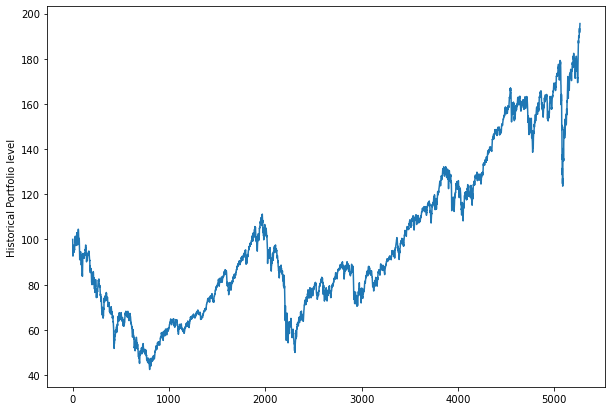

In [41]:
#Plot Portfolio Levels starting from 100
plt.figure(figsize=(10, 7))
plt.ylabel('Historical Portfolio level')
plt.plot(portfolio_past_price)
plt.show()

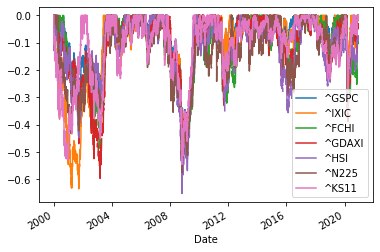

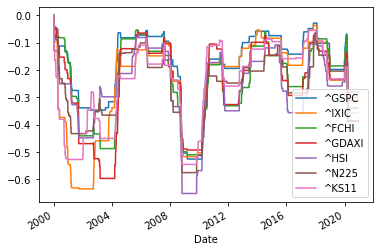

In [42]:
#Plot Max drawdown
# We are going to use a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day in the series.
# Use min_periods=1 if you want to let the first 252 days data have an expanding window
Roll_Max = data.rolling(window, min_periods=1).max()
Daily_Drawdown = data/Roll_Max - 1.0

# Next we calculate the minimum (negative) daily drawdown in that window.
# Use min_periods=1 if you want to allow the expanding window
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()

# Plot the results
Daily_Drawdown.plot()
Max_Daily_Drawdown.plot()
plt.show()

In [43]:
number_of_indices = len(Tickers)

portfolios_returns = []
portfolios_volatility = []

nb_simulations = 15000

In [44]:
for x in range (nb_simulations):
    weights = np.random.random(number_of_indices)
    weights /= np.sum(weights)
    portfolios_returns.append(np.sum(weights * log_returns_data.mean()) * 250)
    portfolios_volatility.append(np.sqrt(np.dot(weights.T,np.dot(log_returns_data.cov() * 250, weights))))                     
                             
portfolios_returns[:10], portfolios_volatility[:10]

([0.03789116462001031,
  0.03854388048247914,
  0.05368317663121155,
  0.043983612085356005,
  0.05278212373262942,
  0.05777496069946611,
  0.047707023582386196,
  0.05911375356773288,
  0.05508003904067352,
  0.04006673844008217],
 [0.16246091291054338,
  0.15701647014861864,
  0.16678419491306173,
  0.1578643360477643,
  0.15988132960260093,
  0.16476776210556063,
  0.15736821813775886,
  0.1661576067476546,
  0.167410984742485,
  0.16189120690025163])

In [45]:
portfolios_returns = np.array(portfolios_returns)
portfolios_volatility = np.array(portfolios_volatility)

In [46]:
possible_portfolios = pd.DataFrame( {'Return' : portfolios_returns, 'Volatility' : portfolios_volatility})

In [47]:
possible_portfolios.head(), possible_portfolios.tail()


(     Return  Volatility
 0  0.037891    0.162461
 1  0.038544    0.157016
 2  0.053683    0.166784
 3  0.043984    0.157864
 4  0.052782    0.159881,
          Return  Volatility
 14995  0.033670    0.168866
 14996  0.041791    0.158066
 14997  0.039219    0.165865
 14998  0.045513    0.166642
 14999  0.047825    0.166726)

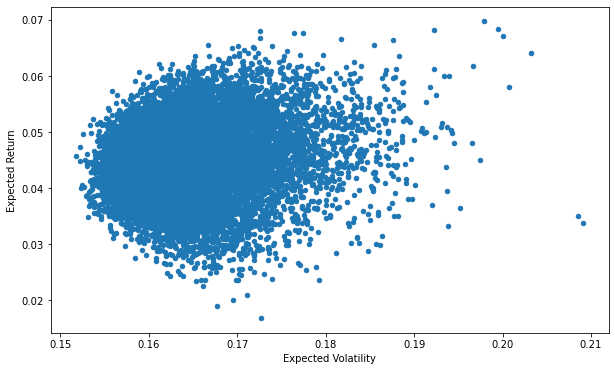

In [48]:
possible_portfolios.plot(x= 'Volatility', y='Return', kind='scatter', figsize=(10, 6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.show()

In [49]:
portfolio_past_perf2 = pd.DataFrame(portfolio_past_perf)
portfolio_past_price2 = pd.DataFrame(portfolio_past_price)

In [50]:
U = portfolio_past_perf2.mean()
var = portfolio_past_perf2.var()
drift = U - 0.5 * var
stdev = portfolio_past_perf2.std()

time_intervals = 260
scenarii = 15

In [51]:
portfolio_past_perf2 = pd.DataFrame(portfolio_past_perf)

In [52]:
S0 = portfolio_past_price2.iloc[-1]

In [53]:
weekly_return = np.exp( drift.values + stdev.values * norm.ppf(np.random.rand(time_intervals, scenarii)))


In [54]:
weekly_return

array([[1.01257341, 0.98457979, 1.00165554, ..., 0.97665653, 0.99795741,
        1.00747886],
       [1.00396366, 0.99853896, 0.99879508, ..., 1.00313856, 0.99628662,
        1.0045474 ],
       [1.00043607, 1.00172606, 1.01298559, ..., 0.99734884, 0.98493757,
        0.98372138],
       ...,
       [0.98300852, 1.00958719, 0.99577852, ..., 0.99412872, 0.98557352,
        1.00673484],
       [0.99816417, 0.99636842, 0.99812971, ..., 1.01795107, 0.99345881,
        1.01127679],
       [1.00852285, 0.99788723, 1.01672163, ..., 0.99410775, 1.00372348,
        1.01023676]])

In [55]:
future_prices = np.zeros_like(weekly_return)


In [56]:
future_prices[0] = S0


In [57]:
for t in range (1, time_intervals):
    future_prices[t] = future_prices[t-1] * ( weekly_return[t])
future_prices

array([[195.54004048, 195.54004048, 195.54004048, ..., 195.54004048,
        195.54004048, 195.54004048],
       [196.31509383, 195.25434798, 195.30442967, ..., 196.15375372,
        194.81392629, 196.42923926],
       [196.40070065, 195.59136824, 197.84057253, ..., 195.63371865,
        191.87955431, 193.23164157],
       ...,
       [171.25689972, 184.11527095, 231.54131675, ..., 174.77632521,
        197.0732779 , 193.59334992],
       [170.94250176, 183.44664076, 231.10826695, ..., 177.9137476 ,
        195.78418358, 195.77646098],
       [172.39941959, 183.05906022, 234.97277344, ..., 176.86543591,
        196.51318169, 197.78057766]])

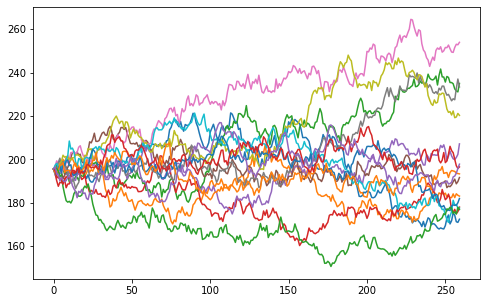

In [58]:
#Plot Monte Carlo Simulation as a decision-making tool
plt.figure(figsize=( 8, 5))
plt.plot(future_prices)
plt.show()